In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm 
import pandas as pd

In [53]:
all_data = np.genfromtxt('data-nopvc-wm.txt', delimiter='')

In [54]:
all_data_ic = np.genfromtxt('data-nopvc.txt', delimiter='')

In [70]:
node = 29
data = all_data[node-1,:]
data_ic = all_data_ic[node-1,:]

(array([  5.,  34., 126., 315., 378., 210., 109.,  63.,  42.,  36.,  32.,
         18.,  18.,   7.,  15.,  16.,  12.,   8.,  10.,  12.,   2.,   7.,
          4.,   8.,   3.,   4.,   5.,   3.,   4.,   2.,   1.,   0.,   0.,
          1.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.915 , 0.9844, 1.0538, 1.1232, 1.1926, 1.262 , 1.3314, 1.4008,
        1.4702, 1.5396, 1.609 , 1.6784, 1.7478, 1.8172, 1.8866, 1.956 ,
        2.0254, 2.0948, 2.1642, 2.2336, 2.303 , 2.3724, 2.4418, 2.5112,
        2.5806, 2.65  , 2.7194, 2.7888, 2.8582, 2.9276, 2.997 , 3.0664,
        3.1358, 3.2052, 3.2746, 3.344 , 3.4134, 3.4828, 3.5522, 3.6216,
        3.691 , 3.7604, 3.8298, 3.8992, 3.9686, 4.038 , 4.1074, 4.1768,
        4.2462, 4.3156, 4.385 ]),
 <BarContainer object of 50 artists>)

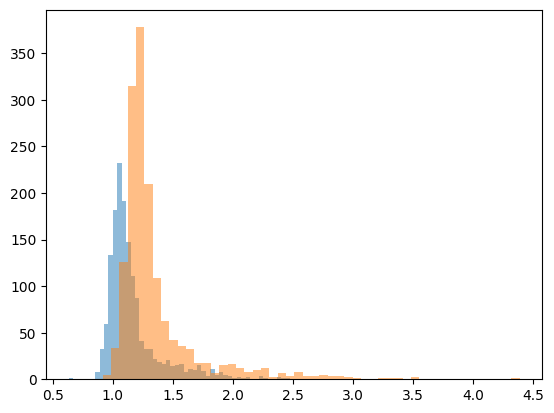

In [71]:
plt.hist(data, bins=50, alpha=0.5);
plt.hist(data_ic,bins=50, alpha=0.5)

In [72]:
model1 = GaussianMixture(n_components=1,random_state=123)
model1.fit(data.reshape(-1,1))

model2 = GaussianMixture(n_components=2,random_state=123)
model2.fit(data.reshape(-1,1))

GaussianMixture(n_components=2, random_state=123)

In [73]:
x_range = np.linspace(np.max(data), np.min(data), len(data));

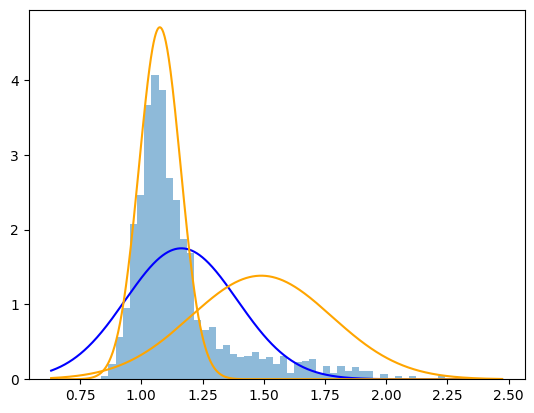

In [74]:
plt.hist(data, bins='auto', density=True, histtype='stepfilled', alpha=0.5)
plt.plot(x_range, norm.pdf(x_range, model1.means_[0][0], np.sqrt(model1.covariances_[0][0][0])), color="blue")
plt.plot(x_range, norm.pdf(x_range, model2.means_[0][0], np.sqrt(model2.covariances_[0][0][0])), color="orange")
plt.plot(x_range, norm.pdf(x_range, model2.means_[1][0], np.sqrt(model2.covariances_[1][0][0])), color="orange")


In [60]:
model1.aic(data.reshape(-1,1))

-1376.5062425654537

In [61]:
model2.aic(data.reshape(-1,1))

-1773.6236243102605

In [64]:
np.arange(1, 73)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

In [90]:
df =  pd.DataFrame(columns = ["region","C0_mean","C1_mean","C0_cov","C1_cov"])

In [91]:
for i in np.arange(0, 72):
    data = all_data[i,:]

    model1 = GaussianMixture(n_components=1,random_state=123)
    model1.fit(data.reshape(-1,1))

    model2 = GaussianMixture(n_components=2,random_state=123)
    model2.fit(data.reshape(-1,1))

    aic1 = model1.aic(data.reshape(-1,1))
    aic2 = model2.aic(data.reshape(-1,1)) 
    if aic1 > aic2: 
        mean_1, mean_2 =  model2.means_[0][0], model2.means_[1][0]
        var_1, var_2 = model2.covariances_[0][0][0], model2.covariances_[1][0][0]
        if mean_1 < mean_2:
            df.loc[i] = [int(i+1), mean_1, mean_2, var_1, var_2]
        elif mean_2 < mean_1:
            df.loc[i] = [int(i+1), mean_2, mean_1, var_2, var_1]


In [92]:
df

,region,C0_mean,C1_mean,C0_cov,C1_cov
0,1.0,1.338970,1.050881,0.050651,0.004312
1,2.0,1.252458,1.014909,0.080375,0.006465
2,3.0,1.101255,0.902606,0.096763,0.009212
3,4.0,1.136380,0.972319,0.050519,0.004092
4,5.0,1.143355,0.977895,0.046325,0.004551
...,...,...,...,...,...
67,68.0,1.286885,0.957332,0.067622,0.005845
68,69.0,0.902116,0.878606,0.014942,0.003624
69,70.0,1.074970,0.966976,0.018743,0.003253
70,71.0,1.209023,1.055396,0.021621,0.007320


In [93]:
df.to_csv("wm-moments.csv")